In [367]:
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
import scipy
%matplotlib inline

## get graph of interest

In [369]:
#place_name = "Berlin, Germany"
place_name = "Moabit, Berlin, Germany"
address = "Helmholtzstraße 30, 10587 Berlin"

# Fetch OSM street network from the location
#place_graph = ox.graph_from_place(place_name, network_type='bike', simplify=True, buffer_dist=500)
place_graph = ox.graph_from_address(address, network_type='bike', simplify=True)

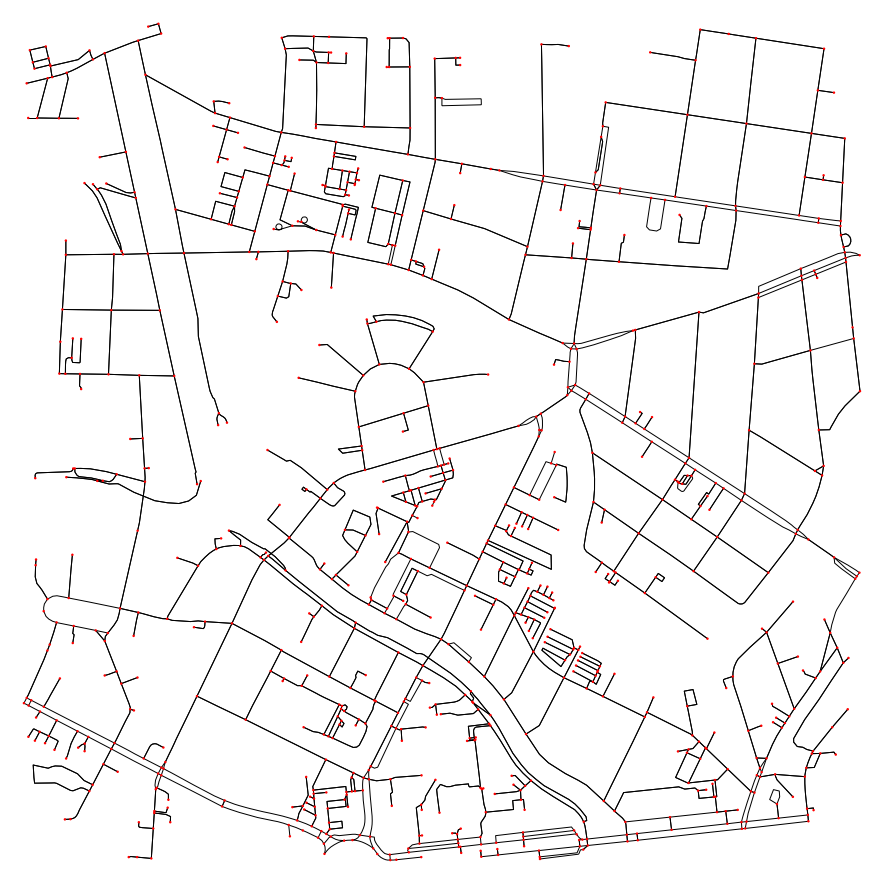

In [234]:
# Plot the streets
fig, ax = ox.plot_graph(place_graph,edge_linewidth=1, node_size=6, figsize=(16,16),
                        bgcolor='#ffffff', edge_color='black', node_color='red'
                        )

## remove unnamed ways

In [370]:
# remove ways without names
graph_nodes, graph_edges = ox.graph_to_gdfs(place_graph)

graph_edges = graph_edges.query('~name.isnull()')
graph_edges = graph_edges.query('highway!=service')

place_graph = ox.graph_from_gdfs(graph_nodes, graph_edges)
place_graph = ox.utils_graph.remove_isolated_nodes(place_graph)
place_graph = ox.utils_graph.get_largest_component(place_graph)
    

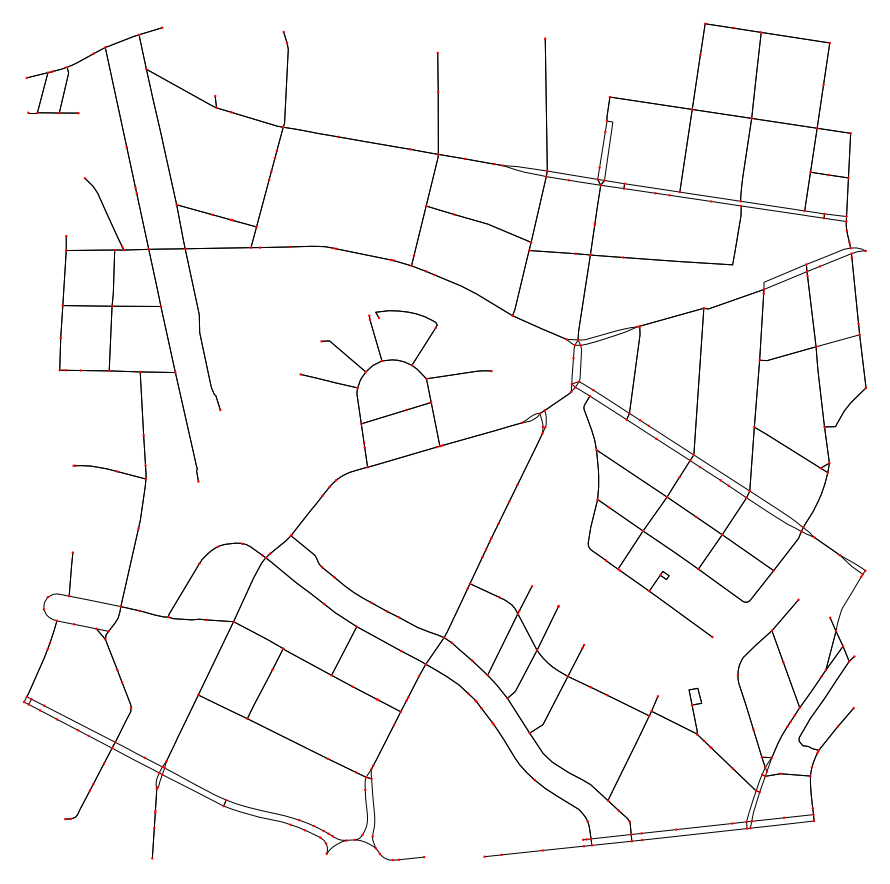

In [236]:
# Plot the streets
fig, ax = ox.plot_graph(place_graph,edge_linewidth=1, node_size=6, figsize=(16,16),
                        bgcolor='#ffffff', edge_color='black', node_color='red'
                        )

## stats

In [237]:
nc = ["r" if place_graph.in_degree(g) > place_graph.out_degree(g) else "blue" if 
      place_graph.in_degree(g) < place_graph.out_degree(g) else "grey" for g in 
 place_graph.nodes()]

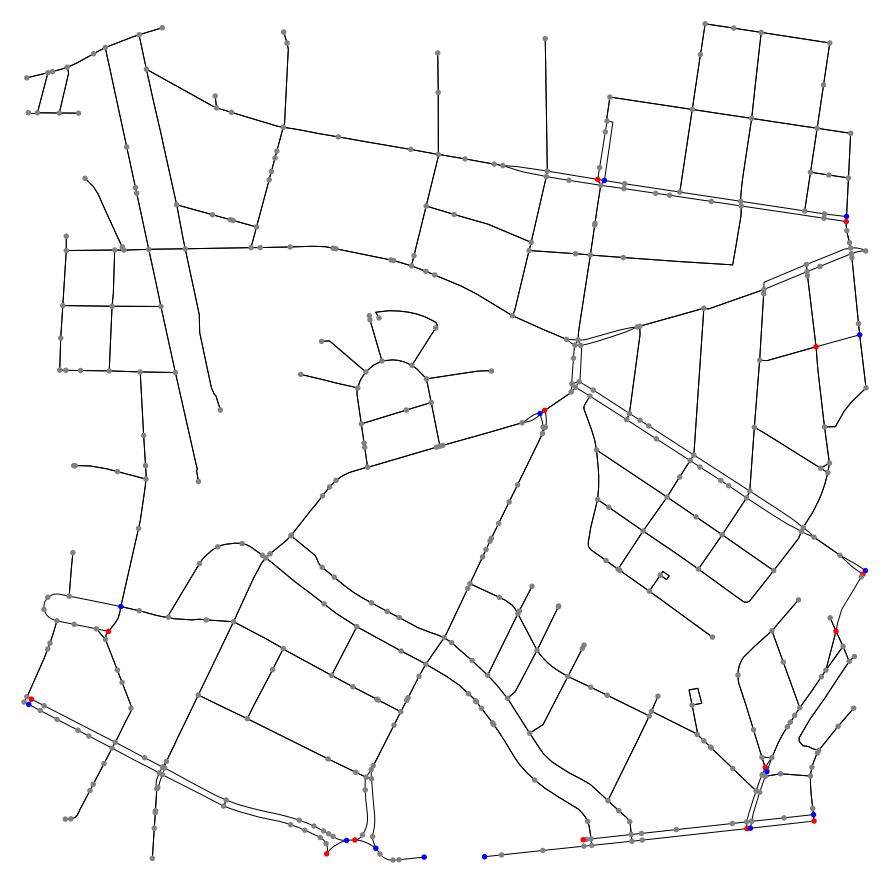

In [238]:
fig, ax = ox.plot_graph(place_graph,edge_linewidth=1, node_size=30, figsize=(16,16),
                        bgcolor='#ffffff', edge_color='black', node_color=nc
                        )

In [360]:
#place_graph = ox.projection.project_graph(place_graph)
place_graph = ox.simplification.consolidate_intersections(place_graph, tolerance=0.0002)

/home/timon/.local/lib/python3.8/site-packages/osmnx/simplification.py:450: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  chunks = get_chunks(gs_nodes.loc[idx].buffer(tolerance).values, n)
/home/timon/.local/lib/python3.8/site-packages/osmnx/simplification.py:502: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = node_clusters.centroid


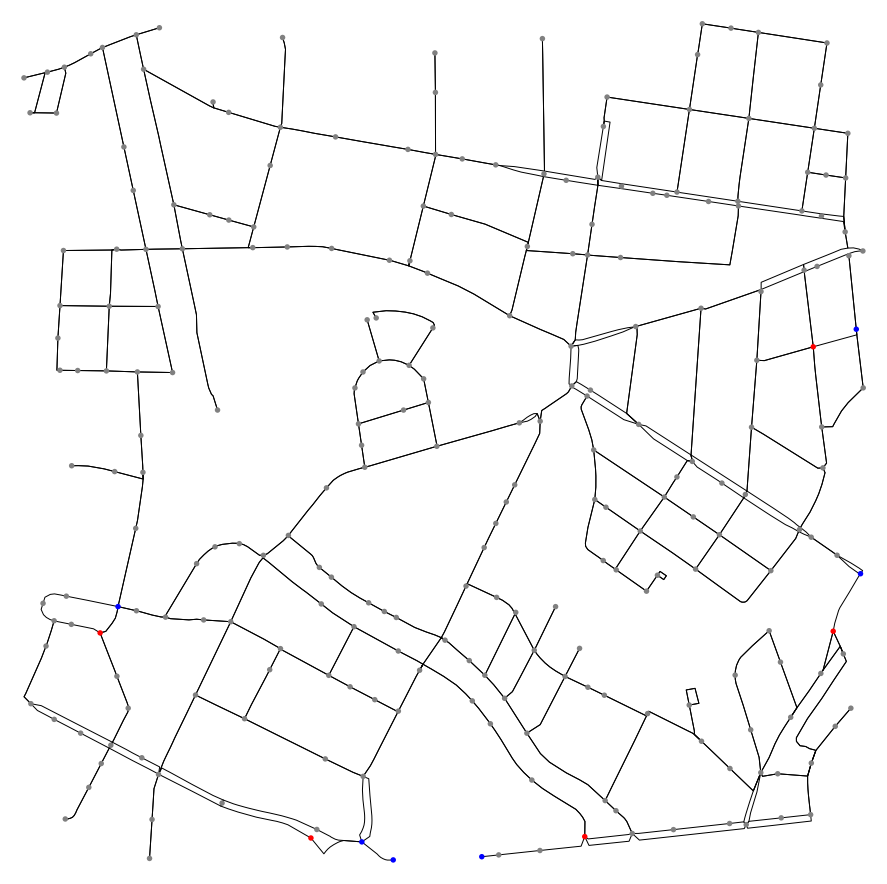

In [293]:
nc = ["r" if place_graph.in_degree(g) > place_graph.out_degree(g) else "blue" if 
      place_graph.in_degree(g) < place_graph.out_degree(g) else "grey" for g in 
 place_graph.nodes()]
fig, ax = ox.plot_graph(place_graph,edge_linewidth=1, node_size=30, figsize=(16,16),
                        bgcolor='#ffffff', edge_color='black', node_color=nc
                        )

In [241]:
stats = ox.stats.basic_stats(place_graph)
print("number of nodes: "+ str(stats['n']))
print("number of steets: "+ str(stats['m']))
print("total steetlength: "+ str(stats['edge_length_total'] / 1000) +"km")
print("durchschnittliche Straßenlänge: "+ str(stats['edge_length_avg']) +"m")

number of nodes: 200
number of steets: 506
total steetlength: 21.848014800177094km
durchschnittliche Straßenlänge: 43.17789486201007m


In [294]:
#g = ox.utils_graph.graph_from_gdfs(nodes, streets)
#place_graph = place_graph.to_undirected()

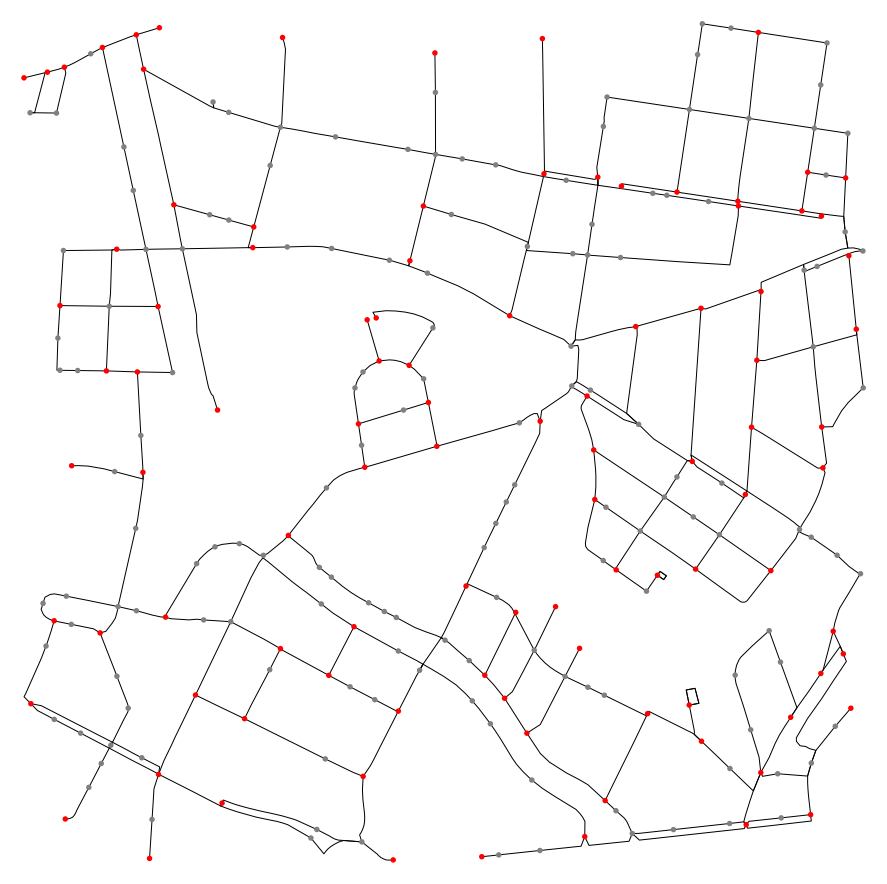

In [297]:
nc = ["r" if place_graph.degree(g) % 2 != 0 else "grey" for g in 
 place_graph.nodes()]
fig, ax = ox.plot_graph(place_graph,edge_linewidth=1, node_size=30, figsize=(16,16),
                        bgcolor='#ffffff', edge_color='black', node_color=nc
                        )

In [373]:
print(nx.algorithms.euler.is_eulerian(place_graph))

nodes = place_graph.nodes()

neg_nodes = [n for n in nodes if place_graph.in_degree(n) < place_graph.out_degree(n)] # more outgoing edges
pos_nodes = [n for n in nodes if place_graph.in_degree(n) > place_graph.out_degree(n)] # more incoming edges

matchingGraph = nx.Graph()
matchingGraph.add_nodes_from(neg_nodes)
matchingGraph.add_nodes_from(pos_nodes)

#nx.drawing.nx_pylab.draw(matchingGraph, node_size=100)

# calculate all shortest Paths
lengths = nx.algorithms.shortest_paths.dense.floyd_warshall(place_graph, weight='length')

# add an edge for every pos_node to every neg_node with weight of the shortest path
for pos_node in pos_nodes:
    for neg_node in neg_nodes:
        if lengths[pos_node][neg_node] != float('inf'): 
            matchingGraph.add_edge(pos_node, neg_node, weight = lengths[pos_node][neg_node])

matching = nx.algorithms.bipartite.matching.minimum_weight_full_matching(matchingGraph, top_nodes= pos_nodes)

nx.drawing.nx_pylab.draw(matchingGraph, node_size=100)
print(nx.algorithms.matching.is_perfect_matching(matchingGraph, matching))
print(matching)


False


ValueError: cost matrix is infeasible

In [361]:
nx.algorithms.shortest_paths.dense.floyd_warshall(place_graph, weight='length')

{0: defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {0: 0,
              16: 0.0008344294768015393,
              1: inf,
              2: inf,
              3: inf,
              4: inf,
              5: 0.006115818462815515,
              6: 267.2209185143422,
              7: 267.21988268225505,
              8: 267.22541587346296,
              9: 294.2892983902692,
              10: 400.925362875916,
              11: 267.2197623210619,
              12: 267.22036287591595,
              13: 294.28745478028753,
              14: 294.28477224198497,
              17: 294.29006264184085,
              18: 0.0041945554739218315,
              19: 323.87991015313173,
              20: 0.006877513313477309,
              21: 267.2199101531317,
              22: 0.0077664469705064874,
              23: 0.008735866233256583,
              24: 464.20622775672814,
              25: 2